In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [3]:
conn = sqlite3.connect('sakila.db')

db = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn , index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [6]:
db.head(3)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


In [9]:
db.shape

(16044, 10)

In [10]:
db.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [17]:
db['store_id'].mean()

1.506170531039641

<AxesSubplot:>

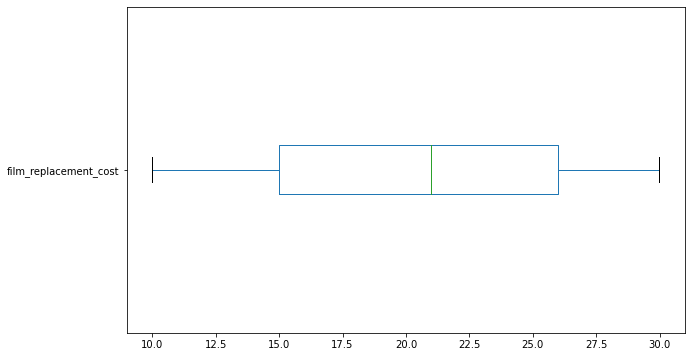

In [19]:
db['film_replacement_cost'].plot(kind='box',vert=False,figsize=(10,6))

<AxesSubplot:ylabel='Density'>

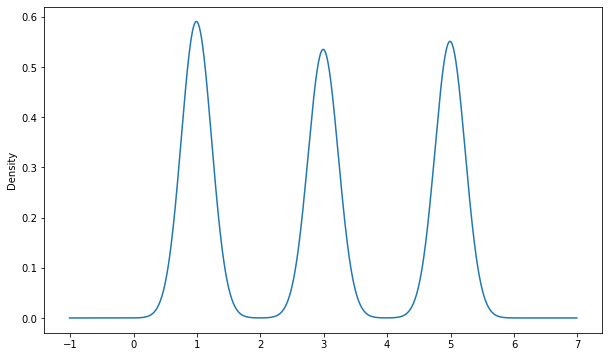

In [22]:
db['film_rental_rate'].plot(kind='density',figsize=(10,6))

Text(0, 0.5, 'Number of Rentals')

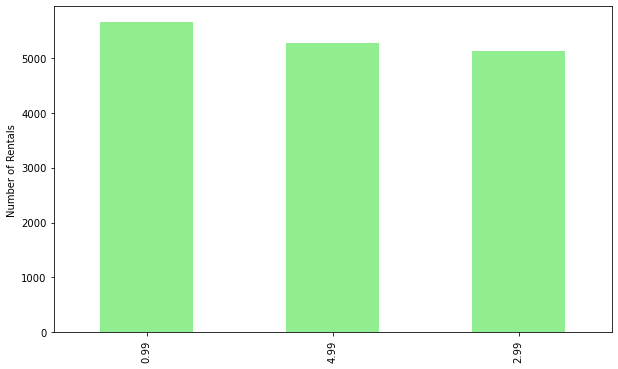

In [48]:
ax = db['film_rental_rate'].value_counts().plot(kind='bar',figsize=(10,6),color='lightgreen')
ax.set_ylabel('Number of Rentals')

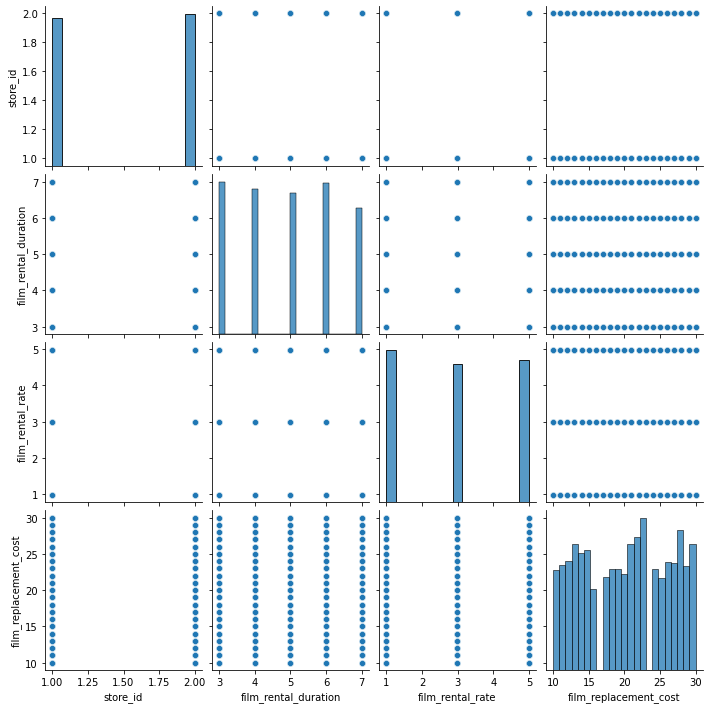

In [32]:
sns.pairplot(db)

In [33]:
db['rental_store_city'].value_counts()

Woodridge     8121
Lethbridge    7923
Name: rental_store_city, dtype: int64

<AxesSubplot:ylabel='rental_store_city'>

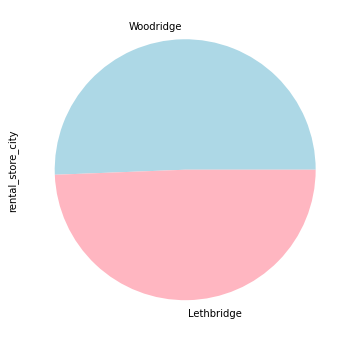

In [51]:
db['rental_store_city'].value_counts().plot(kind='pie',figsize=(6,6),colors=['lightblue','lightpink'])

Text(0, 0.5, 'Number of Rentals')

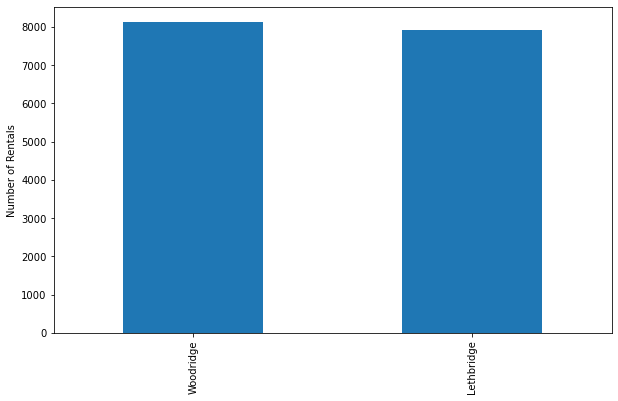

In [53]:
ax=db['rental_store_city'].value_counts().plot(kind='bar',figsize=(10,6))
ax.set_ylabel('Number of Rentals')

In [57]:
db['rental_gain_return'] = db['film_rental_rate'] / db['film_replacement_cost'] *100
db['rental_gain_return'].head()

rental_id
1    13.597090
2    17.598587
3    19.946631
4     4.502046
5     9.969990
Name: rental_gain_return, dtype: float64

<AxesSubplot:ylabel='Density'>

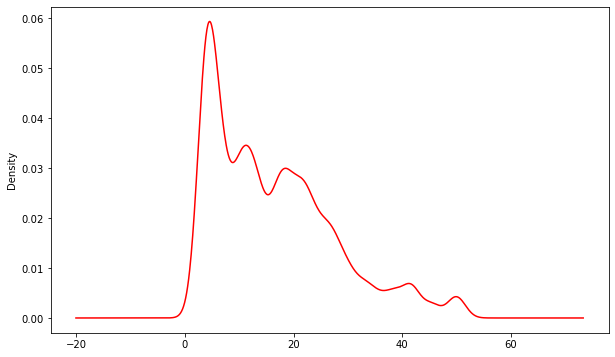

In [59]:
db['rental_gain_return'].plot(kind='density',figsize=(10,6),color='red')

In [66]:
round(db['rental_gain_return'].median(),2)

13.6

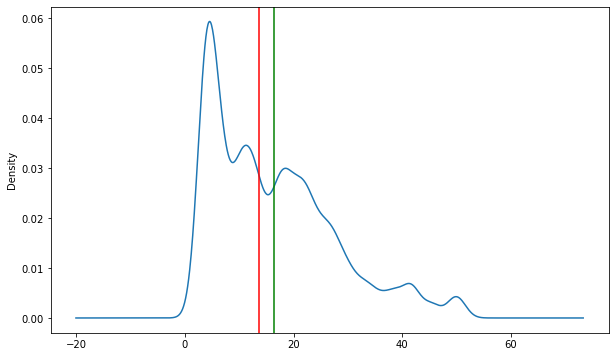

In [67]:
ax=db['rental_gain_return'].plot(kind='density',figsize=(10,6))
ax.axvline(db['rental_gain_return'].median(),color='red')
ax.axvline(db['rental_gain_return'].mean(),color='green')

In [69]:
db['film_title'].value_counts().mean()

16.747390396659707

In [70]:
db

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G,13.597090
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R,17.598587
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G,19.946631
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
...,...,...,...,...,...,...,...,...,...,...,...
16045,2005-08-23 22:25:26,2005-08-25 23:54:26,WHITE,1,Lethbridge,COMANCHEROS ENEMY,5,0.99,23.99,R,4.126719
16046,2005-08-23 22:26:47,2005-08-27 18:02:47,KELLY,2,Woodridge,VOYAGE LEGALLY,6,0.99,28.99,PG-13,3.414971
16047,2005-08-23 22:42:48,2005-08-25 02:48:48,ELLIS,2,Woodridge,ILLUSION AMELIE,4,0.99,15.99,R,6.191370


In [80]:
db[db['film_rental_rate']<2.99]

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R,4.502046
6,2005-05-24 23:08:07,2005-05-27 01:32:07,CHRISTENSON,1,Lethbridge,MYSTIC TRUMAN,5,0.99,19.99,NC-17,4.952476
7,2005-05-24 23:11:53,2005-05-29 20:34:53,WALTERS,2,Woodridge,SWARM GOLD,4,0.99,12.99,PG-13,7.621247
14,2005-05-25 00:31:15,2005-05-26 02:56:15,CULP,2,Woodridge,MONTEREY LABYRINTH,6,0.99,13.99,G,7.076483
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,3.414971
...,...,...,...,...,...,...,...,...,...,...,...
16044,2005-08-23 22:24:39,2005-08-25 04:08:39,CARY,1,Lethbridge,EVERYONE CRAFT,4,0.99,29.99,PG,3.301100
16045,2005-08-23 22:25:26,2005-08-25 23:54:26,WHITE,1,Lethbridge,COMANCHEROS ENEMY,5,0.99,23.99,R,4.126719
16046,2005-08-23 22:26:47,2005-08-27 18:02:47,KELLY,2,Woodridge,VOYAGE LEGALLY,6,0.99,28.99,PG-13,3.414971


In [81]:
db['film_replacement_cost'].min()

9.99

In [89]:
db.loc[db['film_replacement_cost'] == db['film_replacement_cost'].max(),'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

In [95]:
db[(db['film_rental_rate'] > 2.99) | (db['film_rating'] == 'R')].shape[0]

7493